In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/user/Downloads/AI_Startup_Prototype-master/AI_Startup_Prototype-master/chest_xray/train"
CATEGORIES = ["PNEUMONIA", "NORMAL"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to pneumonia or normal
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [64]:
print(img_array.shape)

(760, 1152)


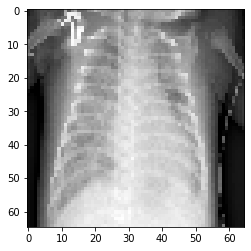

In [16]:
IMG_SIZE = 65
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [17]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to pneumonia or normal
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()           


In [18]:
print(img_array.shape)
print(len(training_data))

(760, 1152)
5216


In [19]:
import random
import tensorflow as tf

random.shuffle(training_data)

In [20]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
0
0
0
1
0


In [21]:
X = []
y = []

In [22]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [140]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [141]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [10]:
X[1]
X = X/200

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [14]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))  #change from relu
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten()) #this converts our 3D feature maps to 1D feature vectors




model.add(Dense(1))
model.add(Activation('relu'))
model.add(Activation('relu')) #my addition

model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
model.fit(X, y, batch_size=20, epochs=10, validation_split=0.3, shuffle = True)

Train on 3651 samples, validate on 1565 samples
Epoch 1/5
3651/3651 [==============================] - 371s 102ms/step - loss: 0.3162 - acc: 0.8568 - val_loss: 0.2202 - val_acc: 0.8831
Epoch 2/5
3651/3651 [==============================] - 245s 67ms/step - loss: 0.1790 - acc: 0.8976 - val_loss: 0.1718 - val_acc: 0.9010
Epoch 3/5
3651/3651 [==============================] - 241s 66ms/step - loss: 0.1759 - acc: 0.9008 - val_loss: 0.1640 - val_acc: 0.9003
Epoch 4/5
 940/3651 [======>.......................] - ETA: 2:27 - loss: 0.0931 - acc: 0.9298

In [ ]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, shuffle = True)

In [95]:
#change image size\#acc=0.7432
from keras.callbacks import TensorBoard
import time

In [ ]:
NAME = "PNEUMONIA-or-NOT-{}".format(int(time.time()))

In [104]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [105]:
model.fit(X, y, batch_size=32, epochs=15, validation_split=0.3, callbacks=[tensorboard])

Train on 10953 samples, validate on 4695 samples
Epoch 1/15
10953/10953 [==============================] - 918s 84ms/step - loss: 0.5709 - acc: 0.7432 - val_loss: 0.5720 - val_acc: 0.7423
Epoch 2/15
10953/10953 [==============================] - 552s 50ms/step - loss: 0.5711 - acc: 0.7432 - val_loss: 0.5709 - val_acc: 0.7423
Epoch 3/15
10953/10953 [==============================] - 408s 37ms/step - loss: 0.5716 - acc: 0.7432 - val_loss: 0.5763 - val_acc: 0.7423
Epoch 4/15
10953/10953 [==============================] - 491s 45ms/step - loss: 0.5709 - acc: 0.7432 - val_loss: 0.5712 - val_acc: 0.7423
Epoch 5/15
10944/10953 [============================>.] - ETA: 0s - loss: 0.5716 - acc: 0.7431

KeyboardInterrupt: 

In [2]:
model.save('med85.tflite')

NameError: name 'model' is not defined